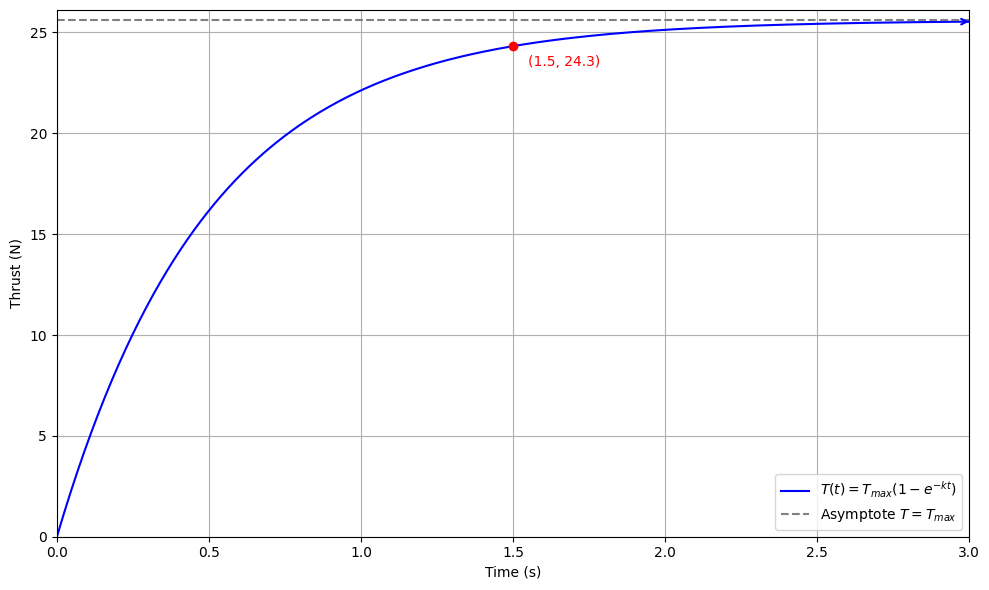

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
T_max = 25.6
k = np.log(0.05) / -1.5

# Time values from 0 to 2 seconds
t = np.linspace(0, 3, 400)
T = T_max * (1 - np.exp(-k * t))

# Specific point at t = 0.5
t_95 = 1.5
T_95 = T_max * 0.95

# Plotting
plt.figure(figsize=(10, 6))



plt.plot(t, T, label=r'$T(t) = T_{max}(1 - e^{-kt})$', color='blue')
plt.axhline(y=T_max, color='gray', linestyle='--', label='Asymptote $T = T_{max}$')
plt.plot(t_95, T_95, 'ro')  # 95% point
plt.text(t_95 + 0.05, T_95 - 1, '(1.5, 24.3)', color='red')

# Labels
plt.xlabel('Time (s)')
plt.ylabel('Thrust (N)')
plt.xlim(0, 3)
plt.ylim(0, T_max * 1.02)
plt.legend()
plt.grid(True)

plt.annotate('', xy=(3, T[-1]), xytext=(3-0.01, T[-2]),
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5))

# Show plot
plt.tight_layout()
plt.show()


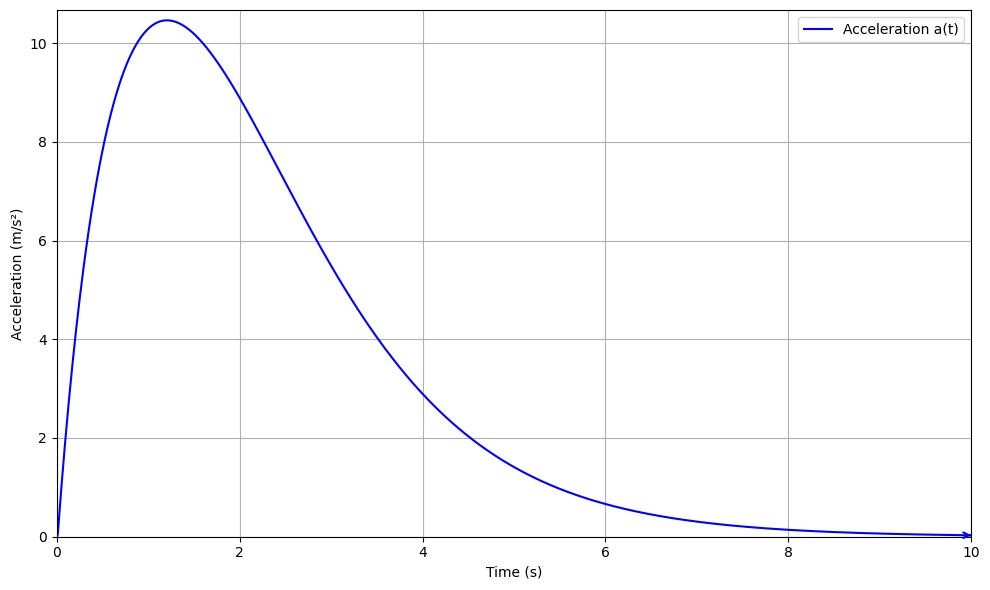

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
m = 2.0  # mass in kg
T_max = 25.6  # N
k = 2.00  # thrust time constant
rho = 1.225  # air density in kg/m^3
Cd = 0.8  # drag coefficient
A = 0.05  # cross-sectional area in m^2 (assumed)
mu = 0.02  # coefficient of friction
g = 9.8  # gravity in m/s^2

# Precomputed constants
drag_coeff = (rho * Cd * A) / (2 * m)
friction_acc = mu * g

# Time setup
dt = 0.01  # time step
t_max = 10  # total time in seconds
steps = int(t_max / dt)
time = np.linspace(0, t_max, steps)

# Initialize arrays
v = np.zeros(steps)
a = np.zeros(steps)
T = T_max * (1 - np.exp(-k * time))  # Thrust function

# Euler's Method
for i in range(1, steps):
    a[i] = T[i]/m - drag_coeff * v[i-1]**2 - friction_acc
    v[i] = v[i-1] + a[i] * dt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, a, label='Acceleration a(t)', color='blue')
plt.annotate('', xy=(t_max, a[-1]), xytext=(t_max-0.01, a[-2]),
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5))
plt.xlim(0, t_max)
plt.ylim(0, np.max(a) * 1.02)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

